In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt

import geopandas as gpd
from shapely import wkt

In [2]:
import cartoframes
from cartoframes.auth import set_default_credentials
from cartoframes.viz import Map, Layer, popup_element, size_bins_style

In [3]:
# from cartoframes.viz.helpers import color_bins_layer

from cartoframes.viz import Map, Layer, basemaps, popup_element, basic_style, color_category_style, color_bins_style, default_legend, color_bins_legend, category_widget, formula_widget,  histogram_widget

In [4]:
set_default_credentials('https://cartoframes.carto.com')

In [5]:
df = pd.read_csv("Final_merged_city_portland_with_NAICS.csv")

In [6]:
df = df.drop(columns = ["Unnamed: 0"])

In [7]:
df = df.drop_duplicates()

In [8]:
df['geometry'] = df['geometry'].apply(wkt.loads)
df['centroid'] = df['centroid'].apply(wkt.loads)
df = gpd.GeoDataFrame(df, geometry='geometry')

In [9]:
replace_values = {11:'Agriculture, Forestry, Fishing and Hunting',
                  12:'Mining, Quarrying, and Oil and Gas Extraction',
                  22:'Utilities',
                  23:'Construction',
                  31:'Manufacturing',
                  32:'Manufacturing',
                  33:'Manufacturing',
                  42:'Wholesale Trade',
                  44:'Retail Trade',
                  45:'Retail Trade',
                  48:'Transportation and Warehousing',
                  49:'Transportation and Warehousing',
                  51:'Information',
                  52:'Finance and Insurance',
                  53:'Real Estate and Rental and Leasing',
                  54:'Professional, Scientific, and Technical Services',
                  55:'Management of Companies and Enterprises',
                  56:'Administrative and Support and Waste Management and Remediation Services',
                  61:'Educational Services',
                  62:'Health Care and Social Assistance',
                  71:'Arts, Entertainment, and Recreation',
                  72:'Accommodation and Food Services',
                  81:'Other Services (except Public Administration)'}

In [10]:
df['maxNaics_est_cat'] = df['maxNaics_est']

In [11]:
df = df.replace({"maxNaics_est_cat": replace_values})

In [12]:
df['maxNaics_est_cat'] = pd.Categorical(df.maxNaics_est_cat)

In [13]:
df2 = df[['geo_id','year','total_tran','pop','edut', 'collegemale', 'collegefemale', 'households', 'income',
       'zipcode', 'Empratio', 'estabratio', 'ratio_65', 'ratio_22_50',
       'bus_ratio', 'bus_ratio_total', 'public_ratio', 'car_ratio',
       'bicy_ratio', 'walked_ratio', 'maxNaics_est', 'totalEstab',
       'maxNaics_emp']]

## Clustering techniques we'll implement
### K means
### Gaussian Mixture
### Birch

In [14]:
from sklearn.cluster import KMeans

[66930908092.714264, 42892610198.52458, 30214517151.617123, 23760624597.901432, 20135207904.3284, 16656890238.011715, 14306613611.797039, 12646147304.647451]


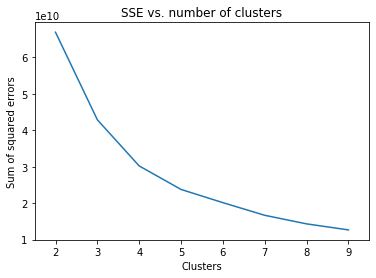

In [31]:
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i,random_state=0)
    res=km.fit(df2)
    SSE.append(res.inertia_)
print (SSE)

plt.gca()
plt.plot(range(2,10),SSE)
plt.xlabel("Clusters")
plt.ylabel("Sum of squared errors")
plt.title("SSE vs. number of clusters")
plt.xlim(1.5,9.5)
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

In [32]:
# Choose a range of cluster numbers that you would like to evalulate:
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters,random_state=0)
    res=km.fit(df2) 
    silhouette_avg = silhouette_score(df2, km.labels_)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.9938340122919634
For n_clusters = 3, the average silhouette_score is : 0.407108651981099
For n_clusters = 4, the average silhouette_score is : 0.4378754042331603
For n_clusters = 5, the average silhouette_score is : 0.3944546486445206
For n_clusters = 6, the average silhouette_score is : 0.40392536424575093
For n_clusters = 7, the average silhouette_score is : 0.32881674789271714
For n_clusters = 8, the average silhouette_score is : 0.3339017861489724
For n_clusters = 9, the average silhouette_score is : 0.3374404936089038


In [76]:
km2 = KMeans(n_clusters=4)

km2cls = km2.fit(df2)

labels = km2cls.labels_

#Then get the frequency count of the non-negative labels
counts = np.bincount(labels[labels>=0])

print (counts)

[1330   16 1282   86]


In [77]:
import collections

labels = numpy.array(labels)
collections.Counter(labels)

Counter({2: 1282, 3: 86, 0: 1330, 1: 16})

____

In [150]:
from sklearn.mixture import GaussianMixture

In [151]:
gmm = GaussianMixture(n_components=3)
res = gmm.fit(df2)

labels = gmm.predict(df2)

In [152]:
counts = np.bincount(labels[labels>=0])

print (counts)

[1728   16  970]


In [153]:
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [154]:
df['gaussian_labels'] = pd.Series(labels, index=df.index)

In [155]:
replace_values = {
    1:'Cluster 1',
    2:'Cluster 2',
    3:'Cluster 3',
    4:'Cluster 4',
    0:'Cluster 0'
}

In [156]:
df['gaussian_labels_cat'] = df['gaussian_labels']

df = df.replace({"gaussian_labels_cat": replace_values})

df['gaussian_labels_cat'] = pd.Categorical(df.gaussian_labels_cat)

In [157]:
Map(Layer(df,color_category_style('gaussian_labels_cat'),popup_hover=[popup_element('maxNaics_est_cat','Industry')],encode_data=False),basemap=basemaps.voyager)

___

In [45]:
from sklearn.cluster import Birch

In [52]:
brc = Birch(n_clusters=3)

brc.fit(df2)

brc.predict(df2)

labels = brc.predict(df2)

#Then get the frequency count of the non-negative labels
counts = np.bincount(labels[labels>=0])

print (counts)

[1690   16 1008]


___